     Train size |   pdq |     Score   | Rank
##### 0.66      311 ==> Test RMSE: 3226.437  =4
##### 0.68      411 ==> Test RMSE: 3237.796  =5
##### 0.66      511 ==> Test RMSE: 3221.934  =3
##### 0.64      511 ==> Test RMSE: 3187.563  =1
##### 0.62      511 ==> Test RMSE: 3402.709  =6
##### 0.65      511 ==> Test RMSE: 3198.165  =2

auto-arima score: RMSE 3197.6141903054377 : Train == 64%,   pdq == 101

best arima score: RMSE: 3187.563 :  Train == 64%,           pdq == 511

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

import warnings

In [2]:
df = pd.read_csv('../datasets/data.csv', index_col=['date'], parse_dates=['date'])

In [3]:
df.head()

,work,income
date,,
2021-09-30,2,2100
2021-10-03,1,3600
2021-10-04,1,4000
2021-10-05,1,7900
2021-10-06,1,7500


<Figure size 640x480 with 0 Axes>

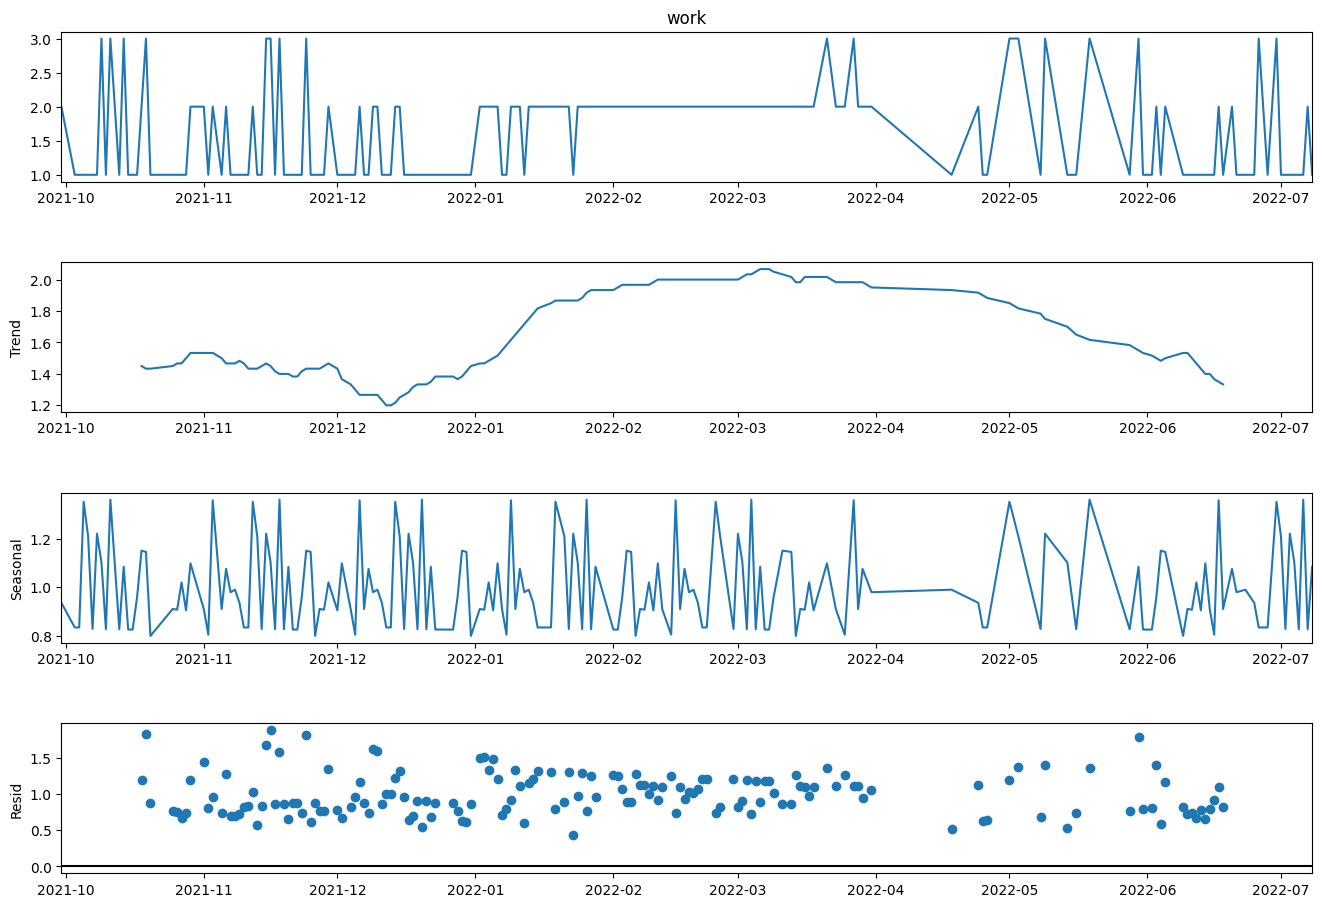

In [4]:
result = seasonal_decompose(df["work"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

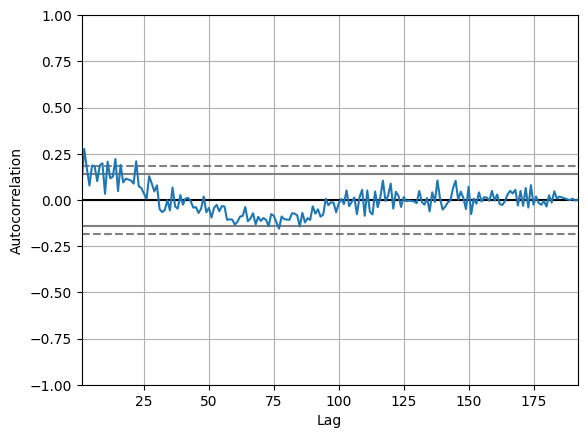

In [6]:
pd.plotting.autocorrelation_plot(df["work"])

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


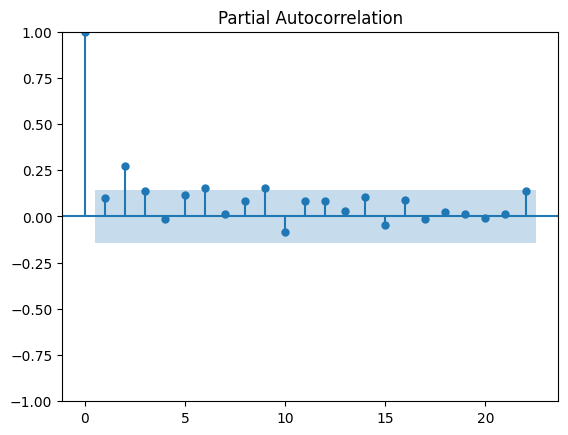

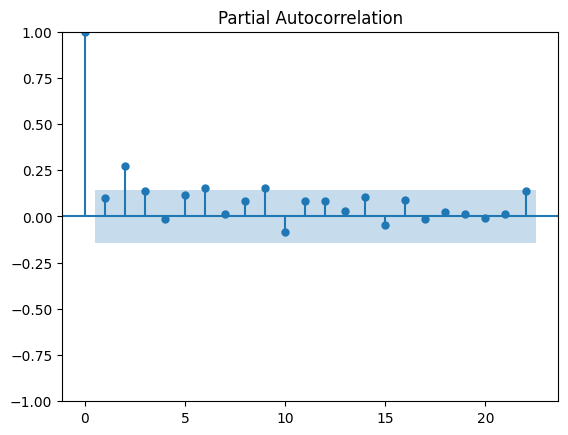

In [7]:
plot_pacf(df["work"], lags = 22)

In [8]:
p, d, q = 8, 1, 1

In [9]:
model=sm.tsa.statespace.SARIMAX(df['work'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
model=model.fit()

In [11]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               work   No. Observations:                  192
Model:             SARIMAX(8, 1, 1)x(8, 1, 1, 12)   Log Likelihood                -170.454
Date:                            Tue, 24 Jan 2023   AIC                            378.908
Time:                                    16:45:38   BIC                            439.469
Sample:                                         0   HQIC                           403.465
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1877      0.147     -1.276      0.202      -0.476       0.101
ar.L2          0.0782      0.140   

In [12]:
predictions = model.predict(len(df), len(df)+10)

c:\Users\Sheasier Shisia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [64]:
print(predictions)

192    5944.509175
193    9417.271641
194    8094.735221
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='date'>

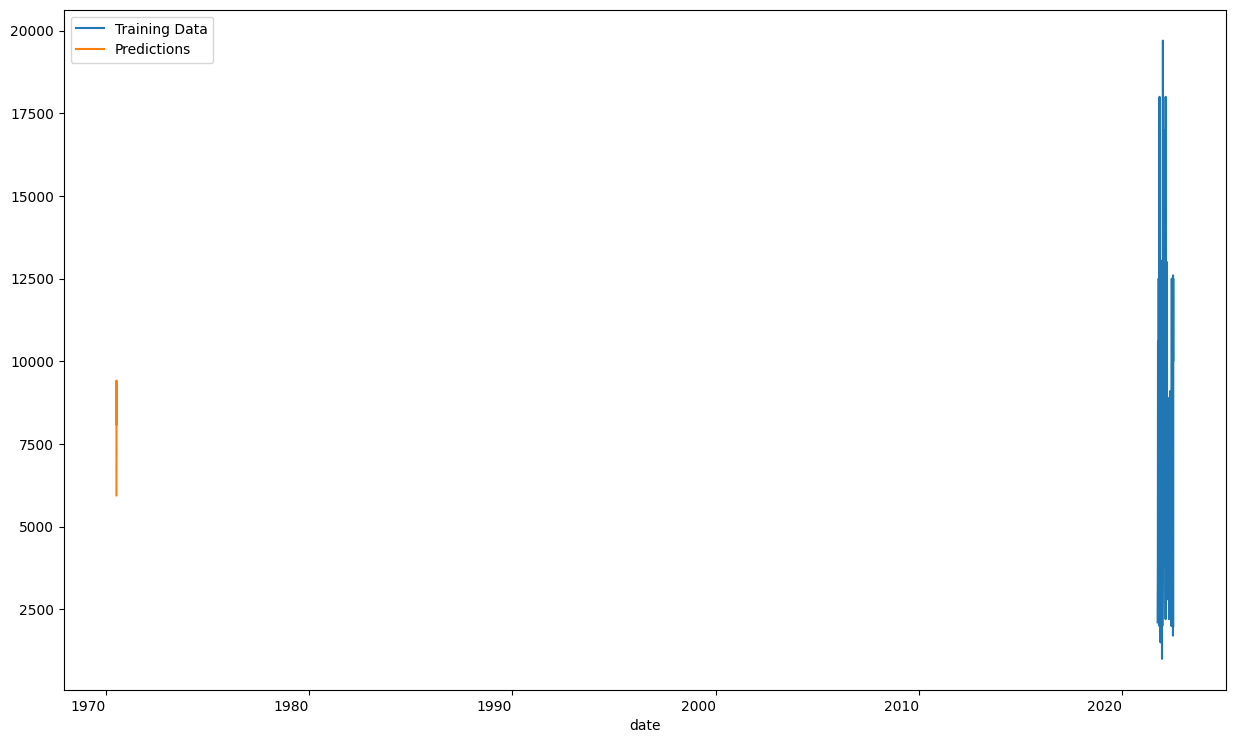

In [65]:
df["work"].plot(legend=True, label="Training Data", figsize=(15, 10))

predictions.plot(legend=True, label="Predictions")